# Import statements

In [94]:
import pandas as pd
import numpy as np

In [95]:
#!pip install imbalanced-learn

# Retrieve data from csv

In [96]:
# For colab
# from google.colab import drive
# drive.mount('/content/drive')

# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_30_mfcc.csv')
# audio_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLA Project/final_df_40_mfcc.csv')

# For local machine or virtual environment
audio_df = pd.read_csv('merged_df.csv')

# drop first column
audio_df.drop('Unnamed: 0', axis='columns', inplace=True)

from sklearn.utils import shuffle
audio_df = shuffle(audio_df)

audio_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
21019,0,Tess\OAF_angry\OAF_seize_angry.wav,-350.966796,13.845707,0.611745,11.448019,-1.417186,0.724716,-14.687740,-2.859846,...,5.749093e-04,4.817842e-04,3.551139e-04,1.701560e-04,-0.049272,-0.045247,-0.104129,0.073547,0.030264,-0.014703
20562,4,Crema\1024_ITH_HAP_XX.wav,-400.159848,125.163872,16.092783,35.469583,1.463682,12.087247,-8.519655,4.195571,...,2.829982e-06,2.802372e-06,2.890931e-06,3.058337e-06,-0.010869,-0.024620,-0.075791,-0.016417,0.029774,0.009044
20483,2,Crema\1072_TSI_DIS_XX.wav,-397.697020,116.439930,21.442520,61.780320,-8.052783,20.048649,-20.435347,8.154740,...,4.863604e-10,4.759031e-10,4.691512e-10,4.649679e-10,-0.006150,-0.008808,-0.036829,-0.086468,0.024399,0.005794
21542,6,Crema\1076_TAI_SAD_XX.wav,-434.818929,113.321880,34.357250,44.454295,-1.625161,9.682900,-8.032416,4.002146,...,2.768514e-06,2.837989e-06,2.503413e-06,2.507951e-06,0.008140,-0.017021,-0.029676,-0.038626,0.020775,0.014507
22704,8,Crema\1045_IEO_ANG_LO.wav,-334.144313,80.966349,30.166717,24.084141,1.747621,0.050145,-0.000588,-3.238193,...,1.441264e-04,1.432854e-04,1.502981e-04,1.593519e-04,0.000150,0.010036,-0.043874,-0.055150,0.023307,0.002951


# Define Class Labels Dictionary


In [97]:
# Define class labels dictionary for with gender
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

# Define class labels dictionary for without gender
label_map_without_gender = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fear',
    4: 'happy',
    5: 'neutral',
    6: 'sad',
    7: 'surprise'
}


# Train Test Split

In [98]:
# train-test split dataset
from sklearn.model_selection import train_test_split

final_df_testing = audio_df.copy()

# For non-augmented data
# X = final_df_testing.drop(columns=['Path', 'Emotions_without_gender', 'Emotions_with_gender'], axis=1)
# y = final_df_testing['Emotions_with_gender']

# For merged data (non-aug + aug)
X = final_df_testing.drop(columns=['Path','Emotions'], axis=1)
y = final_df_testing['Emotions']
print("Data shape:")
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.columns.tolist())
print("X_train shape:")
print(X_train.shape)
print("X_test shape:")
print(X_test.shape)

print("y_train shape:")
print(y_train.shape)
print("y_test shape:")
print(y_test.shape)

Data shape:
(23364, 173) (23364,)
X_train shape:
(18691, 173)
X_test shape:
(4673, 173)
y_train shape:
(18691,)
y_test shape:
(4673,)


# SMOTE

In [99]:
import imblearn

# Handle imbalance classes with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_smote))
print(X_smote.shape)

Original dataset shape Counter({6: 1780, 4: 1754, 3: 1753, 2: 1741, 0: 1737, 5: 1551, 11: 1272, 8: 1250, 10: 1226, 12: 1203, 14: 1202, 13: 970, 7: 783, 9: 163, 15: 156, 1: 150})


Resample dataset shape Counter({4: 1780, 0: 1780, 5: 1780, 3: 1780, 14: 1780, 12: 1780, 8: 1780, 10: 1780, 2: 1780, 7: 1780, 6: 1780, 13: 1780, 9: 1780, 11: 1780, 1: 1780, 15: 1780})
(28480, 173)


In [100]:
X_smote.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


# Data selection for training

## Create column range subset for model

In [101]:
# 1 feature
mfcc_columns = X_smote.filter(regex='^MFCC').columns
spectral_contrast_columns = X_smote.filter(regex='^SC').columns
chroma_columns = X_smote.filter(regex='^C').columns
mel_columns = X_smote.filter(regex='^MEL').columns
tonz_columns = X_smote.filter(regex='^TONZ').columns

# 2 features
mfcc_sc_columns = X_smote.filter(regex='^(MFCC|SC)').columns
mfcc_c_columns = X_smote.filter(regex='^(MFCC|C)').columns
mfcc_mel_columns = X_smote.filter(regex='^(MFCC|MEL)').columns
mfcc_tonz_columns = X_smote.filter(regex='^(MFCC|TONZ)').columns

sc_c_columns = X_smote.filter(regex='^(SC|C)').columns
sc_mel_columns = X_smote.filter(regex='^(SC|MEL)').columns
sc_tonz_columns = X_smote.filter(regex='^(SC|TONZ)').columns

c_mel_columns = X_smote.filter(regex='^(C|MEL)').columns
c_tonz_columns = X_smote.filter(regex='^(C|TONZ)').columns

mel_tonz_columns = X_smote.filter(regex='^(MEL|TONZ)').columns


# 3 features
mfcc_sc_c_columns = X_smote.filter(regex='^(MFCC|SC|C)').columns
mfcc_sc_mel_columns = X_smote.filter(regex='^(MFCC|SC|MEL)').columns
mfcc_sc_tonz_columns = X_smote.filter(regex='^(MFCC|SC|TONZ)').columns
mfcc_c_mel_columns = X_smote.filter(regex='^(MFCC|C|MEL)').columns
mfcc_c_tonz_columns = X_smote.filter(regex='^(MFCC|C|TONZ)').columns
mfcc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|MEL|TONZ)').columns

sc_c_mel_columns = X_smote.filter(regex='^(SC|C|MEL)').columns
sc_c_tonz_columns = X_smote.filter(regex='^(SC|C|TONZ)').columns
sc_mel_tonz_columns = X_smote.filter(regex='^(SC|MEL|TONZ)').columns

c_mel_tonz_columns = X_smote.filter(regex='^(C|MEL|TONZ)').columns


# 4 features
mfcc_sc_c_mel_columns = X_smote.filter(regex='^(MFCC|SC|C|MEL)').columns
mfcc_sc_c_tonz_columns = X_smote.filter(regex='^(MFCC|SC|C|TONZ)').columns
mfcc_sc_mel_tonz_columns = X_smote.filter(regex='^(MFCC|SC|MEL|TONZ)').columns
mfcc_c_mel_tonz_columns = X_smote.filter(regex='^(MFCC|C|MEL|TONZ)').columns
sc_c_mel_tonz_columns = X_smote.filter(regex='^(SC|C|MEL|TONZ)').columns



In [102]:
# check length for each data column subset
print("MFCC: " + str(len(mfcc_columns)))
print("Spectral Contrast: " + str(len(spectral_contrast_columns)))
print("Chroma: " + str(len(chroma_columns)))
print("Mel: " + str(len(mel_columns)))
print("Tonz: " + str(len(tonz_columns)))
print("MFCC + Spectral Contrast: " + str(len(mfcc_sc_columns)))
print("MFCC + Chroma: " + str(len(mfcc_c_columns)))
print("MFCC + Mel: " + str(len(mfcc_mel_columns)))
print("MFCC + Tonz: " + str(len(mfcc_tonz_columns)))
print("Spectral Contrast + Chroma: " + str(len(sc_c_columns)))
print("Spectral Contrast + Mel: " + str(len(sc_mel_columns)))
print("Spectral Contrast + Tonz: " + str(len(sc_tonz_columns)))
print("Chroma + Mel: " + str(len(c_mel_columns)))
print("Chroma + Tonz: " + str(len(c_tonz_columns)))
print("Mel + Tonz: " + str(len(mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma: " + str(len(mfcc_sc_c_columns)))
print("MFCC + Spectral Contrast + Mel: " + str(len(mfcc_sc_mel_columns)))
print("MFCC + Spectral Contrast + Tonz: " + str(len(mfcc_sc_tonz_columns)))
print("MFCC + Chroma + Mel: " + str(len(mfcc_c_mel_columns)))
print("MFCC + Chroma + Tonz: " + str(len(mfcc_c_tonz_columns)))
print("MFCC + Mel + Tonz: " + str(len(mfcc_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel: " + str(len(sc_c_mel_columns)))
print("Spectral Contrast + Chroma + Tonz: " + str(len(sc_c_tonz_columns)))
print("Spectral Contrast + Mel + Tonz: " + str(len(sc_mel_tonz_columns)))
print("Chroma + Mel + Tonz: " + str(len(c_mel_tonz_columns)))
print("MFCC + Spectral Contrast + Chroma + Mel: " + str(len(mfcc_sc_c_mel_columns)))
print("MFCC + Spectral Contrast + Chroma + Tonz: " + str(len(mfcc_sc_c_tonz_columns)))
print("MFCC + Spectral Contrast + Mel + Tonz: " + str(len(mfcc_sc_mel_tonz_columns)))
print("MFCC + Chroma + Mel + Tonz: " + str(len(mfcc_c_mel_tonz_columns)))
print("Spectral Contrast + Chroma + Mel + Tonz: " + str(len(sc_c_mel_tonz_columns)))

MFCC: 20
Spectral Contrast: 7
Chroma: 12
Mel: 128
Tonz: 6
MFCC + Spectral Contrast: 27
MFCC + Chroma: 32
MFCC + Mel: 148
MFCC + Tonz: 26
Spectral Contrast + Chroma: 19
Spectral Contrast + Mel: 135
Spectral Contrast + Tonz: 13
Chroma + Mel: 140
Chroma + Tonz: 18
Mel + Tonz: 134
MFCC + Spectral Contrast + Chroma: 39
MFCC + Spectral Contrast + Mel: 155
MFCC + Spectral Contrast + Tonz: 33
MFCC + Chroma + Mel: 160
MFCC + Chroma + Tonz: 38
MFCC + Mel + Tonz: 154
Spectral Contrast + Chroma + Mel: 147
Spectral Contrast + Chroma + Tonz: 25
Spectral Contrast + Mel + Tonz: 141
Chroma + Mel + Tonz: 146
MFCC + Spectral Contrast + Chroma + Mel: 167
MFCC + Spectral Contrast + Chroma + Tonz: 45
MFCC + Spectral Contrast + Mel + Tonz: 161
MFCC + Chroma + Mel + Tonz: 166
Spectral Contrast + Chroma + Mel + Tonz: 153


## Using 1 feature

### Extract MFCC

In [103]:
X_smote_mfcc_only = X_smote[mfcc_columns]
X_smote_mfcc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,MFCC14,MFCC15,MFCC16,MFCC17,MFCC18,MFCC19
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,-3.727380,-4.839237,-3.999259,-13.814809,1.564657,-16.586742,1.273579,-8.862783,-3.654606,-6.355377
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,-3.242971,-1.946777,-1.224783,-2.137664,-2.696521,-3.465678,-1.567904,-2.144674,-4.213369,-3.135556
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,-1.357050,-4.619898,-4.394324,-6.145395,-2.604321,-6.843390,-4.897904,-6.462433,-4.189073,-5.036248
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,-7.353583,2.057894,-4.503634,4.542440,-9.536434,0.762023,-0.282827,-1.832077,-9.073311,-3.405596
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,-4.839070,-7.224942,-7.723458,-6.748894,-2.235548,2.043546,4.859212,5.147596,2.950754,1.410238


### Extract SPECTRAL_CONTRAST


In [104]:
X_smote_spectral_contrast_only = X_smote[spectral_contrast_columns]
X_smote_spectral_contrast_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375


### Extract CHROMA


In [105]:
X_smote_chroma_only = X_smote[chroma_columns]
X_smote_chroma_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,0.357150,0.424409,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,0.545971,0.359243
1,0.512786,0.591727,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,0.548951,0.467695
2,0.350011,0.398759,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,0.478921,0.361851
3,0.138268,0.294748,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,0.137509,0.143272
4,0.282283,0.310342,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,0.604340,0.407617


### Extract MEL

In [106]:
X_smote_mel_only = X_smote[mel_columns]
X_smote_mel_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.001603,0.004791,0.017213,0.038988,0.060027,0.080328,0.144065,0.182304,0.185156,0.183092,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,0.037021,0.025893,0.026612,0.045803,0.103877,0.208335,0.219794,1.138466,0.649373,0.384342,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,0.003261,0.037473,0.062451,0.053562,0.056010,0.037400,0.071335,0.077905,0.075818,0.243288,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,0.011944,0.003718,0.000733,0.000473,0.000426,0.045849,5.311986,4.340745,0.064139,0.012835,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,0.029825,0.022735,0.035671,0.087213,0.060321,0.040185,0.046291,0.133291,0.234303,0.430927,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### Extract TONZ

In [107]:
X_smote_tonz_only = X_smote[tonz_columns]
X_smote_tonz_only.head()

,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


## Using 2 features

### MFCC and SPECTRAL CONTRAST

In [108]:
X_smote_mfcc_sc_only = X_smote[mfcc_sc_columns]
X_smote_mfcc_sc_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC17,MFCC18,MFCC19,SC0,SC1,SC2,SC3,SC4,SC5,SC6
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,-8.862783,-3.654606,-6.355377,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,-2.144674,-4.213369,-3.135556,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,-6.462433,-4.189073,-5.036248,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,-1.832077,-9.073311,-3.405596,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,5.147596,2.950754,1.410238,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375


### MFCC and CHROMA

In [109]:
X_smote_mfcc_c_only = X_smote[mfcc_c_columns]
X_smote_mfcc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,0.545971,0.359243
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,0.548951,0.467695
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,0.478921,0.361851
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,0.137509,0.143272
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,0.604340,0.407617


### MFCC and MEL

In [110]:
X_smote_mfcc_mel_only = X_smote[mfcc_mel_columns]
X_smote_mfcc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### MFCC and TONZ

In [111]:
X_smote_mfcc_tonz_only = X_smote[mfcc_tonz_columns]
X_smote_mfcc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MFCC16,MFCC17,MFCC18,MFCC19,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,1.273579,-8.862783,-3.654606,-6.355377,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,-1.567904,-2.144674,-4.213369,-3.135556,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,-4.897904,-6.462433,-4.189073,-5.036248,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,-0.282827,-1.832077,-9.073311,-3.405596,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,4.859212,5.147596,2.950754,1.410238,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### SPECTRAL CONTRAST and CHROMA

In [112]:
X_smote_sc_c_only = X_smote[sc_c_columns]
X_smote_sc_c_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.357150,0.424409,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,0.545971,0.359243
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.512786,0.591727,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,0.548951,0.467695
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.350011,0.398759,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,0.478921,0.361851
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.138268,0.294748,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,0.137509,0.143272
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.282283,0.310342,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,0.604340,0.407617


### SPECTRAL CONTRAST and MEL

In [113]:
X_smote_sc_mel_only = X_smote[sc_mel_columns]
X_smote_sc_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.001603,0.004791,0.017213,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.037021,0.025893,0.026612,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.003261,0.037473,0.062451,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.011944,0.003718,0.000733,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.029825,0.022735,0.035671,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### SPECTRAL CONTRAST and TONZ

In [114]:
X_smote_sc_tonz_only = X_smote[sc_tonz_columns]
X_smote_sc_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### CHROMA and MEL

In [115]:
X_smote_c_mel_only = X_smote[c_mel_columns]
X_smote_c_mel_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,0.357150,0.424409,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,0.512786,0.591727,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,0.350011,0.398759,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,0.138268,0.294748,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,0.282283,0.310342,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### CHROMA and TONZ

In [116]:
X_smote_c_tonz_only = X_smote[c_tonz_columns]
X_smote_c_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.357150,0.424409,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,0.545971,0.359243,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,0.512786,0.591727,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,0.548951,0.467695,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,0.350011,0.398759,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,0.478921,0.361851,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,0.138268,0.294748,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,0.137509,0.143272,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,0.282283,0.310342,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,0.604340,0.407617,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### MEL and TONZ

In [117]:
X_smote_mel_tonz_only = X_smote[mel_tonz_columns]
X_smote_mel_tonz_only.head()

,MEL0,MEL1,MEL2,MEL3,MEL4,MEL5,MEL6,MEL7,MEL8,MEL9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.001603,0.004791,0.017213,0.038988,0.060027,0.080328,0.144065,0.182304,0.185156,0.183092,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,0.037021,0.025893,0.026612,0.045803,0.103877,0.208335,0.219794,1.138466,0.649373,0.384342,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,0.003261,0.037473,0.062451,0.053562,0.056010,0.037400,0.071335,0.077905,0.075818,0.243288,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,0.011944,0.003718,0.000733,0.000473,0.000426,0.045849,5.311986,4.340745,0.064139,0.012835,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,0.029825,0.022735,0.035671,0.087213,0.060321,0.040185,0.046291,0.133291,0.234303,0.430927,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


## Using 3 features

### MFCC and SPECTRAL CONTRAST and CHROMA

In [118]:
X_smote_mfcc_sc_c_only = X_smote[mfcc_sc_c_columns]
X_smote_mfcc_sc_c_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,0.545971,0.359243
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,0.548951,0.467695
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,0.478921,0.361851
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,0.137509,0.143272
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,0.604340,0.407617


### MFCC and SPECTRAL CONTRAST and MEL

In [119]:
X_smote_mfcc_sc_mel_only = X_smote[mfcc_sc_mel_columns]
X_smote_mfcc_sc_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### MFCC and SPECTRAL CONTRAST and TONZ

In [120]:
X_smote_mfcc_sc_tonz_only = X_smote[mfcc_sc_tonz_columns]
X_smote_mfcc_sc_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,SC3,SC4,SC5,SC6,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,15.121137,17.944043,16.637559,66.087801,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,14.604826,14.858821,14.471772,14.480699,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,16.051932,16.419676,15.052686,14.839536,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,19.918962,20.273548,20.101810,44.820830,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,15.735026,15.930028,14.912980,14.125375,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### MFCC and CHROMA and MEL

In [121]:
X_smote_mfcc_c_mel_only = X_smote[mfcc_c_mel_columns]
X_smote_mfcc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### MFCC and CHROMA and TONZ

In [122]:
X_smote_mfcc_c_tonz_only = X_smote[mfcc_c_tonz_columns]
X_smote_mfcc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,0.473244,0.513539,0.545971,0.359243,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,0.577420,0.607483,0.548951,0.467695,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,0.357873,0.449068,0.478921,0.361851,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,0.331959,0.156010,0.137509,0.143272,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,0.590009,0.602320,0.604340,0.407617,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### MFCC and MEL and TONZ

In [123]:
X_smote_mfcc_mel_tonz_only = X_smote[mfcc_mel_tonz_columns]
X_smote_mfcc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### SPECTRAL CONTRAST and CHROMA and MEL

In [124]:
X_smote_sc_c_mel_only = X_smote[sc_c_mel_columns]
X_smote_sc_c_mel_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.357150,0.424409,0.336143,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.512786,0.591727,0.570285,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.350011,0.398759,0.413841,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.138268,0.294748,0.354981,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.282283,0.310342,0.366477,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### SPECTRAL CONTRAST and CHROMA and TONZ

In [125]:
X_smote_sc_c_tonz_only = X_smote[sc_c_tonz_columns]
X_smote_sc_c_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.357150,0.424409,0.336143,...,0.473244,0.513539,0.545971,0.359243,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.512786,0.591727,0.570285,...,0.577420,0.607483,0.548951,0.467695,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.350011,0.398759,0.413841,...,0.357873,0.449068,0.478921,0.361851,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.138268,0.294748,0.354981,...,0.331959,0.156010,0.137509,0.143272,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.282283,0.310342,0.366477,...,0.590009,0.602320,0.604340,0.407617,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### SPECTRAL CONTRAST and MEL and TONZ

In [126]:
X_smote_sc_mel_tonz_only = X_smote[sc_mel_tonz_columns]
X_smote_sc_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,MEL0,MEL1,MEL2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.001603,0.004791,0.017213,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.037021,0.025893,0.026612,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.003261,0.037473,0.062451,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.011944,0.003718,0.000733,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.029825,0.022735,0.035671,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### CHROMA and MEL and TONZ

In [127]:
X_smote_c_mel_tonz_only = X_smote[c_mel_tonz_columns]
X_smote_c_mel_tonz_only.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,0.357150,0.424409,0.336143,0.301393,0.339696,0.457739,0.431325,0.390522,0.473244,0.513539,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,0.512786,0.591727,0.570285,0.544045,0.497769,0.494968,0.422800,0.454216,0.577420,0.607483,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,0.350011,0.398759,0.413841,0.494121,0.526928,0.476020,0.435538,0.333993,0.357873,0.449068,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,0.138268,0.294748,0.354981,0.132749,0.115121,0.191765,0.597733,0.834107,0.331959,0.156010,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,0.282283,0.310342,0.366477,0.332215,0.372891,0.357844,0.401575,0.540130,0.590009,0.602320,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


## Using 4 features

### MFCC and SPECTRAL CONTRAST and CHROMA and MEL

In [128]:
X_smote_mfcc_sc_c_mel_only = X_smote[mfcc_sc_c_mel_columns]
X_smote_mfcc_sc_c_mel_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL118,MEL119,MEL120,MEL121,MEL122,MEL123,MEL124,MEL125,MEL126,MEL127
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,4.213546e-09,3.827649e-09,3.558385e-09,3.369254e-09,3.229192e-09,3.125345e-09,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,7.067783e-03,7.460582e-03,6.795676e-03,7.310435e-03,7.326722e-03,6.888164e-03,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.834177e-04,4.665488e-04,4.388064e-04,4.296669e-04,4.265620e-04,4.469315e-04,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,1.237441e-03,1.749833e-03,1.621653e-03,1.467947e-03,1.615321e-03,7.775363e-04,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.338047e-03,2.247264e-03,2.408596e-03,2.311980e-03,2.369534e-03,2.336200e-03,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03


### MFCC and SPECTRAL CONTRAST and CHROMA and TONZ

In [129]:
X_smote_mfcc_sc_c_tonz_only = X_smote[mfcc_sc_c_tonz_columns]
X_smote_mfcc_sc_c_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,C8,C9,C10,C11,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,0.473244,0.513539,0.545971,0.359243,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,0.577420,0.607483,0.548951,0.467695,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,0.357873,0.449068,0.478921,0.361851,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,0.331959,0.156010,0.137509,0.143272,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,0.590009,0.602320,0.604340,0.407617,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### MFCC and SPECTRAL CONTRAST and MEL and TONZ

In [130]:
X_smote_mfcc_sc_mel_tonz_only = X_smote[mfcc_sc_mel_tonz_columns]
X_smote_mfcc_sc_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### MFCC and CHROMA and MEL and TONZ

In [131]:
X_smote_mfcc_c_mel_tonz_only = X_smote[mfcc_c_mel_tonz_columns]
X_smote_mfcc_c_mel_tonz_only.head()

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,-429.183300,141.667800,-6.603000,38.845154,-8.282477,24.827991,-18.727955,7.565588,-9.020371,1.233624,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,-221.204140,24.882113,13.019435,10.029725,5.895898,-1.442795,-2.851156,1.260324,-1.090938,-2.739147,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,-295.365304,57.813924,11.114345,8.641024,5.779576,10.905838,0.829909,-0.910725,-2.924838,3.801497,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,-459.815220,77.674190,20.313860,30.995453,-1.973640,6.767184,-3.101565,-21.196490,-0.252501,-3.351825,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,-243.076763,44.712096,12.405244,14.539414,6.812140,-2.897871,-3.743618,1.308048,-4.328574,-6.353275,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


### SPECTRAL CONTRAST and CHROMA and MEL and TONZ

In [132]:
X_smote_sc_c_mel_tonz_only = X_smote[sc_c_mel_tonz_columns]
X_smote_sc_c_mel_tonz_only.head()

,SC0,SC1,SC2,SC3,SC4,SC5,SC6,C0,C1,C2,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,18.083865,14.174649,15.728845,15.121137,17.944043,16.637559,66.087801,0.357150,0.424409,0.336143,...,3.051174e-09,2.997417e-09,2.962913e-09,2.941458e-09,-0.033711,-0.006377,-0.055858,-0.035753,0.002850,-0.004504
1,12.765922,13.990126,16.593727,14.604826,14.858821,14.471772,14.480699,0.512786,0.591727,0.570285,...,6.573683e-03,6.289368e-03,6.635183e-03,7.248800e-03,0.001369,-0.010921,-0.040265,0.013067,-0.006934,-0.004986
2,15.030949,15.949449,17.579923,16.051932,16.419676,15.052686,14.839536,0.350011,0.398759,0.413841,...,4.733236e-04,4.601278e-04,4.567499e-04,4.632471e-04,-0.010437,0.019218,-0.024453,-0.003178,0.014138,0.012077
3,26.077660,24.640156,24.813943,19.918962,20.273548,20.101810,44.820830,0.138268,0.294748,0.354981,...,7.232785e-04,6.246809e-04,4.022672e-04,4.680597e-05,0.159024,0.138060,0.309260,-0.146096,0.118013,-0.040216
4,11.543424,14.969941,17.007102,15.735026,15.930028,14.912980,14.125375,0.282283,0.310342,0.366477,...,2.211547e-03,2.081768e-03,2.216870e-03,2.235191e-03,0.007330,0.008002,-0.031911,-0.053075,0.019112,-0.009778


# Assign data to variable for pre-processing

In [133]:
# Combination options

opt_1 = [X_smote, X_test] # all 5 features

# 1 feature
opt_2 = [X_smote_mfcc_only, X_test[mfcc_columns]] # mfcc
opt_3 = [X_smote_spectral_contrast_only, X_test[spectral_contrast_columns]] # spectral contrast
opt_4 = [X_smote_chroma_only, X_test[chroma_columns]] # chroma
opt_5 = [X_smote_mel_only, X_test[mel_columns]] # mel
opt_6 = [X_smote_tonz_only, X_test[tonz_columns]] # tonz

# 2 feature
opt_7 = [X_smote_mfcc_sc_only, X_test[mfcc_sc_columns]] # mfcc + sc
opt_8 = [X_smote_mfcc_c_only, X_test[mfcc_c_columns]] # mfcc + c
opt_9 = [X_smote_mfcc_mel_only, X_test[mfcc_mel_columns]] # mfcc + mel
opt_10 = [X_smote_mfcc_tonz_only, X_test[mfcc_tonz_columns]] # mfcc + tonz
opt_11 = [X_smote_sc_c_only, X_test[sc_c_columns]] # sc + c
opt_12 = [X_smote_sc_mel_only, X_test[sc_mel_columns]] # sc + mel
opt_13 = [X_smote_sc_tonz_only, X_test[sc_tonz_columns]] # sc + tonz
opt_14 = [X_smote_c_mel_only, X_test[c_mel_columns]] # c + mel
opt_15 = [X_smote_c_tonz_only, X_test[c_tonz_columns]] # c + tonz
opt_16 = [X_smote_mel_tonz_only, X_test[mel_tonz_columns]] # mel + tonz

# 3 feature
opt_17 = [X_smote_mfcc_sc_c_only, X_test[mfcc_sc_c_columns]] # mfcc + sc + c
opt_18 = [X_smote_mfcc_sc_mel_only, X_test[mfcc_sc_mel_columns]] # mfcc + sc + mel
opt_19 = [X_smote_mfcc_sc_tonz_only, X_test[mfcc_sc_tonz_columns]] # mfcc + sc + tonz
opt_20 = [X_smote_mfcc_c_mel_only, X_test[mfcc_c_mel_columns]] # mfcc + c + mel
opt_21 = [X_smote_mfcc_c_tonz_only, X_test[mfcc_c_tonz_columns]] # mfcc + c + tonz
opt_22 = [X_smote_mfcc_mel_tonz_only, X_test[mfcc_mel_tonz_columns]] # mfcc + mel + tonz
opt_23 = [X_smote_sc_c_mel_only, X_test[sc_c_mel_columns]] # sc + c + mel
opt_24 = [X_smote_sc_c_tonz_only, X_test[sc_c_tonz_columns]] # sc + c + tonz
opt_25 = [X_smote_sc_mel_tonz_only, X_test[sc_mel_tonz_columns]] # sc + mel + tonz
opt_26 = [X_smote_c_mel_tonz_only, X_test[c_mel_tonz_columns]] # c + mel + tonz

# 4 feature
opt_27 = [X_smote_mfcc_sc_c_mel_only, X_test[mfcc_sc_c_mel_columns]] # mfcc + sc + c + mel
opt_28 = [X_smote_mfcc_sc_c_tonz_only, X_test[mfcc_sc_c_tonz_columns]] # mfcc + sc + c + tonz
opt_29 = [X_smote_mfcc_sc_mel_tonz_only, X_test[mfcc_sc_mel_tonz_columns]] # mfcc + sc + mel + tonz
opt_30 = [X_smote_mfcc_c_mel_tonz_only, X_test[mfcc_c_mel_tonz_columns]] # mfcc + c + mel + tonz
opt_31 = [X_smote_sc_c_mel_tonz_only, X_test[sc_c_mel_tonz_columns]] # sc + c + mel + tonz

# Assign selection option to a variable to be used to pass into the preprocess function defined below
selected_option = opt_1
opt = 'opt_1'

# Conduct normalization? (boolean): True / False
normalize_input = False

# Normalization technique? (string): min max / zscore / ''
norm_tech = ''

# Create sequential data? (boolean): True / False
create_sequence = False


# Preprocess data for input to model

## Function to preprocess inputs

In [134]:
# Function to preprocess data
def pre_process_inputs(X_train, X_test, normalize_bool = False, norm_technique='', create_sequence = False):

  # Create sequence (if this is not done, sequence length is 1)
  # Optional, if this is false, move move to step 1 below. 
  if create_sequence:
      # Hyperparameters
      sequence_length = 10
      overlap = 5
        
      # Create a list to store the sequences
      train_sequences = []
      test_sequences = []
      
      # Iterate over the columns to create sequences
      for i in range(0, X_train.shape[1] - sequence_length + 1, overlap):
          sequence = X_train.iloc[:, i : i + sequence_length]
          train_sequences.append(sequence)

      # Iterate over the columns to create sequences
      for i in range(0, X_test.shape[1] - sequence_length + 1, overlap):
          sequence = X_test.iloc[:, i : i + sequence_length]
          test_sequences.append(sequence)

      # Concatenate the sequences into a new DataFrame
      train_sequences_df = pd.concat(train_sequences, axis=1)
      test_sequences_df = pd.concat(test_sequences, axis=1)

      # Convert into numpy array
      X_train_sequence_array = train_sequences_df.values
      X_test_sequence_array = test_sequences_df.values

      # Get num of rows for training and test data
      train_num_rows = X_train.shape[0]
      test_num_rows = X_test.shape[0]

      # Get num of columns, taking sequence into account 
      train_num_features = X_train_sequence_array.shape[1] // sequence_length
      test_num_features = X_test_sequence_array.shape[1] // sequence_length

      # Reshape array
      train_sequence_array_reshaped = X_train_sequence_array.reshape(train_num_rows, sequence_length, train_num_features)
      test_sequence_array_reshaped = X_test_sequence_array.reshape(test_num_rows, sequence_length, test_num_features)
      
      return train_sequence_array_reshaped, test_sequence_array_reshaped
      

  # Step 1: Convert to numpy array
  train_features_array = X_train.values
  test_features_array = X_test.values


  # Step 2 [Optional]: Do normalization
  if normalize_bool:
    if norm_technique == 'min max':
      # Normalization Technique 1: Min Max scaling
      train_scaled_features_minmax = (train_features_array - np.min(train_features_array)) / (np.max(train_features_array) - np.min(train_features_array))
      test_scaled_features_minmax = (test_features_array - np.min(test_features_array)) / (np.max(test_features_array) - np.min(test_features_array))

    elif norm_technique == 'zscore':
      # Normalization Technique 2: Z-score
      train_scaled_features_zscore = (train_features_array - np.mean(train_features_array)) / np.std(train_features_array)
      test_scaled_features_zscore = (test_features_array - np.mean(test_features_array)) / np.std(test_features_array)


  # Step 3: Assign data to variable (created if we want to do normalization before this step)
  X_train_feature_for_model = train_features_array
  X_test_feature_for_model = test_features_array


  # Step 4: Reshape data for input to RNN 
  # Reshape train data
  reshaped_X_train_feature_for_model = np.expand_dims(X_train_feature_for_model, axis=-1)
  reshaped_X_train_feature_for_model = np.reshape(reshaped_X_train_feature_for_model, (reshaped_X_train_feature_for_model.shape[0], 1, (reshaped_X_train_feature_for_model.shape[1])))
  print("Train data shape after reshaping:", reshaped_X_train_feature_for_model.shape)

  # Reshape test data
  reshaped_X_test_feature_for_model = np.expand_dims(X_test_feature_for_model, axis=-1)
  reshaped_X_test_feature_for_model = np.reshape(reshaped_X_test_feature_for_model, (reshaped_X_test_feature_for_model.shape[0], 1, (reshaped_X_test_feature_for_model.shape[1])))
  print("Test data shape after reshaping:", reshaped_X_test_feature_for_model.shape)

  return reshaped_X_train_feature_for_model, reshaped_X_test_feature_for_model


## Conduct preprocessing with selected options (above preprocess function cell)

In [135]:
# Preprocess selected data
pre_processed_X_train, pre_processed_X_test = pre_process_inputs(selected_option[0], selected_option[1], normalize_input, norm_tech, create_sequence)

# check shape of data
print(pre_processed_X_train.shape)
print(pre_processed_X_test.shape)

Train data shape after reshaping: (28480, 1, 173)
Test data shape after reshaping: (4673, 1, 173)
(28480, 1, 173)
(4673, 1, 173)


## One hot encode labels 

In [136]:
# Step 5: One hot encode labels
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform integer labels
y_train_one_hot_encoded = label_binarizer.fit_transform(y_smote)
y_test_one_hot_encoded = label_binarizer.fit_transform(y_test)

# Reshape test shape 
y_train_reshaped = y_train_one_hot_encoded.reshape(y_train_one_hot_encoded.shape[0], 1, y_train_one_hot_encoded.shape[1])
y_test_reshaped = y_test_one_hot_encoded.reshape(y_test_one_hot_encoded.shape[0], 1, y_test_one_hot_encoded.shape[1])

# If create sequence is true, reshape labels shape
if create_sequence:
    y_train_reshaped = np.repeat(y_train_one_hot_encoded[:, np.newaxis, :], 10, axis=1)
    y_test_reshaped = np.repeat(y_test_one_hot_encoded[:, np.newaxis, :], 10, axis=1)

print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(28480, 1, 16)
(4673, 1, 16)


In [137]:
#!pip install tensorflow

# Build and compile model

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

num_classes = y_smote.nunique()

# {'hidden_size': 1024, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'dense_units': 64}
def create_model(input_shape, batch_size, hidden_size=1024, dropout_rate=0.2, learning_rate=0.0001, dense_units=64):
    num_classes = y_smote.nunique()
    
    model = Sequential()
    model.add(Input(shape=input_shape))

    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(hidden_size, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Add Dense layer with L2 Regularization
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    

    # optimizer = 'adam'
    # optimizer = 'RMSprop'
    # optimizer = 'Nadam'
    optimizer = Adam(learning_rate = learning_rate)

    # Use categorical crossentropy if labels are one hot encoded
    # Use sparse categorical crossentropy if labels are label encoded meaning they are represented by integers
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Set the batch_size parameter for model.fit
    model.batch_size = batch_size

    return model

# Train and evaluate model

In [139]:
# Hyper parameters for training model
epochs = 50
batch_size = 32

model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size)
model.summary()

# Train the model
history = model.fit(pre_processed_X_train, y_train_reshaped, validation_split=0.2, epochs=epochs, shuffle=True)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 1, 1024)        │     4,907,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 1, 1024)        │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 1, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1, 16)          │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,168,144 (115.08 MB)

 Trainable params: 30,159,952 (115.05 MB)

 Non-trainable params: 8,192 (32.00 KB)

Epoch 1/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.3944 - loss: 2.0354 - val_accuracy: 0.3699 - val_loss: 1.6796
Epoch 2/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5312 - loss: 1.3961 - val_accuracy: 0.4584 - val_loss: 1.6369
Epoch 3/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5719 - loss: 1.2516 - val_accuracy: 0.4947 - val_loss: 1.4105
Epoch 4/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5964 - loss: 1.1556 - val_accuracy: 0.5063 - val_loss: 1.4814
Epoch 5/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6188 - loss: 1.0800 - val_accuracy: 0.4912 - val_loss: 1.3316
Epoch 6/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6250 - loss: 1.0482 - val_accuracy: 0.6578 - val_loss: 1.0468
Epoch 7/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6432 - loss: 0.9917 - val_accuracy: 0.4558 - val_loss: 1.8194
Epoch 8/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6651 - loss: 0.9340 - val_acc

In [140]:
# Evaluate the model
test_loss, test_acc = model.evaluate(pre_processed_X_test, y_test_reshaped)
print(f"Test accuracy: {test_acc:.4f}")
print(opt)

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7151 - loss: 1.1394
Test accuracy: 0.7385
opt_1


# Save model

In [141]:
# Save the model that is trained using all the audio features
# model.save("/content/drive/My Drive/Colab Notebooks/MLA Project/rnn_model_all_feature.keras")

# model.save("rnn_model_all_feature.keras")

# Plot training history

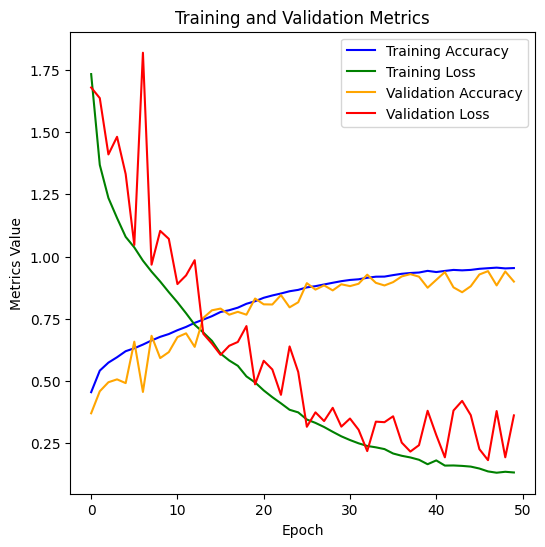

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


# Hyperparameter tuning

In [143]:
#!pip install keras_tuner

In [144]:
# # Define the hyperparameters search space
# hyperparam_distribution_range = {
#     'batch_size': [16, 32, 64, 128],
#     'learning_rate': [0.0001, 0.001, 0.01],
#     'hidden_size': [128, 256, 512, 1024],
#     'dense_units': [64, 128, 256, 512],
#     'dropout_rate': [0.1, 0.2, 0.3]
# }

# best_accuracy = 0.0
# best_hyperparameters = {}

# for batch_size in hyperparam_distribution_range['batch_size']:
#     for learning_rate in hyperparam_distribution_range['learning_rate']:
#         for hidden_size in hyperparam_distribution_range['hidden_size']:
#             for dense_units in hyperparam_distribution_range['dense_units']:
#                 for dropout_rate in  hyperparam_distribution_range['dropout_rate']:
#                     print(batch_size, learning_rate, hidden_size, dense_units, dropout_rate)
#                     # Build the model
#                     model = create_model((pre_processed_X_train.shape[1], pre_processed_X_train.shape[2]), batch_size, hidden_size, dropout_rate, learning_rate, dense_units)
                    
#                     # Train the model
#                     model.fit(pre_processed_X_train, y_train_reshaped, epochs=50, verbose=0, validation_split=0.2, shuffle=True)
    
#                     # Get the validation accuracy from the history
#                     val_accuracy = history.history['val_accuracy'][-1]
    
#                     # Check if it is the highest accuracy
#                     if val_accuracy > best_accuracy:
#                         best_hyperparameters = {
#                             'batch_size': batch_size,
#                             'learning_rate': learning_rate,
#                             'hidden_size': hidden_size,
#                             'dense_units': dense_units,
#                             'dropout_rate': dropout_rate
#                         }
                

# # Print the best hyperparameters and accuracy
# print("Best Hyperparameters:")
# print(best_hyperparameters)
# print("Best Accuracy:", best_accuracy)

# Confusion Matrix on Test data

In [145]:
# !pip install seaborn

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


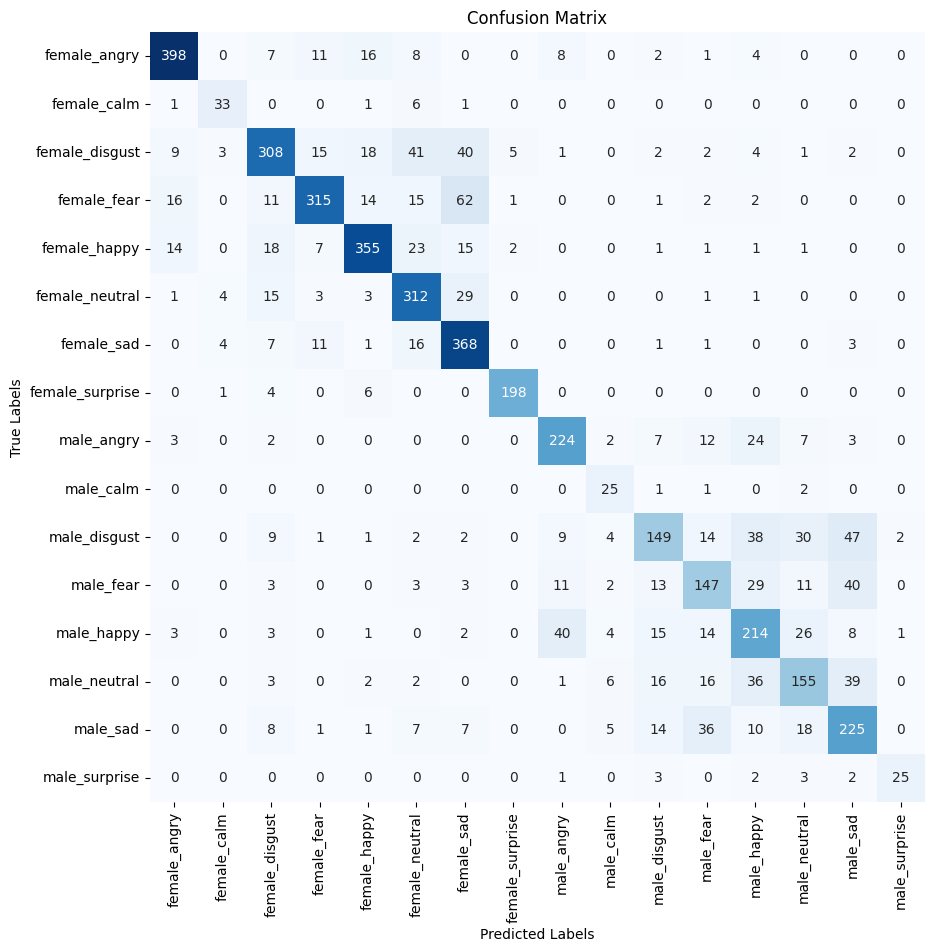

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted labels
y_pred = model.predict(pre_processed_X_test)

# Remove the center dimension
y_pred = y_pred[:, 0, :]

# If your model outputs probabilities and you want to get the class with highest probability
# Converts one hot encoded labels back to integer values
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a list of class labels
class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# Evaluation using F1 score

In [151]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions and calculate metrics
y_pred = model.predict(pre_processed_X_test)
# Remove the center dimension
y_pred = y_pred[:, 0, :]
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print("\n")

# For a detailed classification report including precision, recall, f1-score per class
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.744062088848827, Recall: 0.7384977530494329, F1-Score: 0.7371943820670653


                 precision    recall  f1-score   support

   female_angry       0.89      0.87      0.88       455
    female_calm       0.73      0.79      0.76        42
 female_disgust       0.77      0.68      0.73       451
    female_fear       0.87      0.72      0.78       439
   female_happy       0.85      0.81      0.83       438
 female_neutral       0.72      0.85      0.78       369
     female_sad       0.70      0.89      0.78       412
female_surprise       0.96      0.95      0.95       209
     male_angry       0.76      0.79      0.77       284
      male_calm       0.52      0.86      0.65        29
   male_disgust       0.66      0.48      0.56       308
      male_fear       0.59      0.56      0.58       262
     male_happy       0.59      0.65      0.61       331
   male_neutral       0.61      0.56      0.58       276
       male_sa

# Make Predictions

In [148]:
# import librosa

# # Function to extract features
# def extract_features(audio_file):
#   # Load audio file
#   data, sample_rate = librosa.load(audio_file)

#   # Extract features
#   mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#   spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T,axis=0)
#   chroma = np.mean(librosa.feature.chroma_stft(y=data, sr=sample_rate).T,axis=0)
#   mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T,axis=0)
#   tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sample_rate).T,axis=0)

#   # Create dataframe with extracted features
#   features = np.concatenate([mfcc, spectral_contrast, chroma, mel, tonnetz])
#   feature_names = [f'MFCC_{i}' for i in range(mfcc.shape[0])] + \
#                     [f'SPECTRAL_CONTRAST_{i}' for i in range(spectral_contrast.shape[0])] + \
#                     [f'CHROMA_{i}' for i in range(chroma.shape[0])] + \
#                     [f'MEL_{i}' for i in range(mel.shape[0])] + \
#                     [f'TONZ_{i}' for i in range(tonnetz.shape[0])]
#   feature_df = pd.DataFrame([features], columns=feature_names)

#   return feature_df


# # Function to reshape feature
# def reshape_feature(extracted_feature):
#   extracted_feature = extracted_feature.values
#   reshaped_feature = np.expand_dims(extracted_feature, -1)

#   return reshaped_feature


# # Function to prediction
# def get_prediction(audio_feature, with_gender):
#   prediction = model.predict(audio_feature)
#   label = np.argmax(prediction, axis=1)
#   if with_gender:
#     categorical_label = label_map_with_gender[label[0]]
#   else:
#     categorical_label = label_map_without_gender[label[0]]

#   return categorical_label

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>